# Player Performance Prediction

Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn

Reading the dataset

In [4]:
football_data = pd.read_excel(r'CompleteDataset.xlsx')

### 1. Exploring the dataset

In [5]:
football_data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
football_data.shape

(17981, 74)

In [7]:
football_data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [8]:
football_data.dtypes

Unnamed: 0       int64
Name            object
Age              int64
Photo           object
Nationality     object
                ...   
RM             float64
RS             float64
RW             float64
RWB            float64
ST             float64
Length: 74, dtype: object

Using graphs to further understand our dataset

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Age Distribution - Histogram

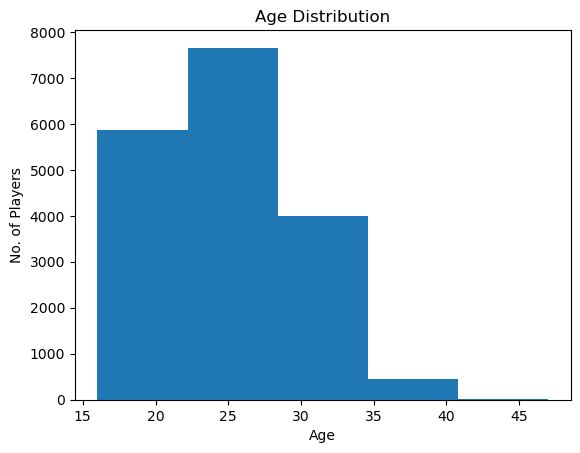

In [10]:
#creating an instance of an object 
fig = plt.figure()

#creating a subplot
ax = fig.add_subplot(1,1,1)

#defining a histogram for Age
ax.hist(football_data['Age'],bins=5)


#Labelling and titles
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('No. of Players')

#to display the graph
plt.show()

Overall Rating Distribution

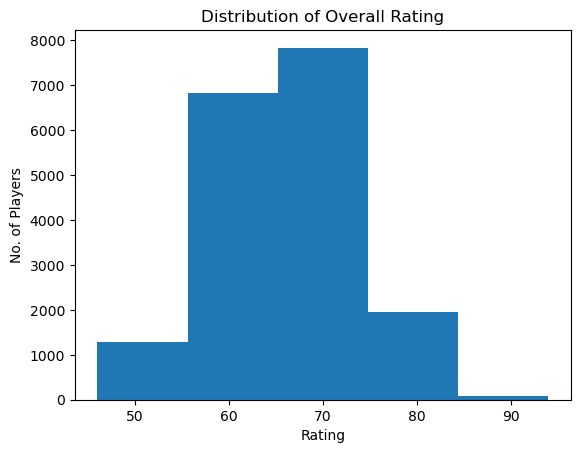

In [11]:
#creating an instance of an object 
fig = plt.figure()

#creating a subplot
ax = fig.add_subplot(1,1,1)

#defining a histogram for Age
ax.hist(football_data['Overall'],bins=5)


#Labelling and titles
plt.title('Distribution of Overall Rating')
plt.xlabel('Rating')
plt.ylabel('No. of Players')

#to display the graph
plt.show()

### 2. Data preprocessing

Picking only the required columns and dropping the rest

In [12]:
football_data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

The below ones are the selected Numerical columns

In [13]:
num_columns = ['Age','Overall','Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

The below ones are the selected categorical columns

In [14]:
cat_columns = []

As of now, we are not using any of the categorical columns because things like ones nationality or the club he/she plays for shouldn't create a discrimination among players, atleast thats what a ethical player performance predicting machine should do

In [15]:
filtered_data = football_data[num_columns]

In [16]:
filtered_data.head()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,32,94,89,63,89,63,93,95,85,81,...,96,83,94,23,91,92,31,80,85,88
1,30,93,92,48,90,95,95,96,77,89,...,95,88,85,26,87,73,28,59,90,85
2,25,92,94,56,96,82,95,92,75,81,...,88,81,80,33,90,78,24,53,80,83
3,30,92,88,78,86,60,91,83,77,86,...,93,83,87,38,77,89,45,80,84,88
4,31,92,58,29,52,35,48,70,15,14,...,85,55,25,11,61,44,10,83,70,11


In [17]:
filtered_data = filtered_data.dropna()

In [18]:
filtered_data.isnull().any()

Age                   False
Overall               False
Acceleration          False
Aggression            False
Agility               False
Balance               False
Ball control          False
Composure             False
Crossing              False
Curve                 False
Dribbling             False
Finishing             False
Free kick accuracy    False
GK diving             False
GK handling           False
GK kicking            False
GK positioning        False
GK reflexes           False
Heading accuracy      False
Interceptions         False
Jumping               False
Long passing          False
Long shots            False
Marking               False
Penalties             False
Positioning           False
Reactions             False
Short passing         False
Shot power            False
Sliding tackle        False
Sprint speed          False
Stamina               False
Standing tackle       False
Strength              False
Vision                False
Volleys             

In [19]:
filtered_data.isna().any().sum()

0

Defining the features

In [20]:
features = filtered_data.columns
features

Index(['Age', 'Overall', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

Defining the values of x, y and no. of. features

In [21]:
filtered_data.dtypes

Age                    int64
Overall                int64
Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
GK diving             object
GK handling           object
GK kicking            object
GK positioning        object
GK reflexes           object
Heading accuracy      object
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking               object
Penalties             object
Positioning           object
Reactions             object
Short passing         object
Shot power            object
Sliding tackle        object
Sprint speed          object
Stamina               object
Standing tackle       object
Strength              object
Vision        

In [22]:
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce', downcast='integer')

In [23]:
filtered_data.dtypes

Age                      int8
Overall                  int8
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
GK diving             float64
GK handling           float64
GK kicking            float64
GK positioning        float64
GK reflexes           float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
Standing tackle       float64
Strength  

In [24]:
filtered_data = filtered_data.dropna()
filtered_data.isna().any().sum()

0

In [25]:
X=filtered_data.copy()
X.head()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,32,94,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,30,93,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,25,92,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,30,92,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,31,92,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


In [26]:
del X['Overall']
X.head()

,Age,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,32,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,30,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,25,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,30,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,31,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


In [27]:
X.shape

(17322, 35)

In [28]:
X.dtypes

Age                      int8
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
GK diving             float64
GK handling           float64
GK kicking            float64
GK positioning        float64
GK reflexes           float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
Standing tackle       float64
Strength              float64
Vision    

In [29]:
y=filtered_data['Overall']
y

0        94
1        93
2        92
3        92
4        92
         ..
17976    46
17977    46
17978    46
17979    46
17980    46
Name: Overall, Length: 17322, dtype: int8

In [30]:
no_of_features = len(X.columns)
no_of_features

35

In [31]:
features_to_pick = 10

a. Pearson Correlation

Pearson correlation is available in both Numpy and Scipy libraries, Here we are using the Numpy's correlation calculation

In [32]:
feature_names = list(X.columns)
feature_names

['Age',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys']

In [33]:
def pearson_correlation(X,y,features_to_pick):
    corr_list = []
    feature_list = list(X.columns)
    
    # finding the correlation values of each feature in feature list
    for f in feature_list:
        corr = np.corrcoef(X[f],y)[0,1]
        corr_list.append(corr)

    # if any NaN values present in corr_list, then make it as zero
    corr_list = [0 if np.isnan(c) else c for c in corr_list]

    # Ranking the features in corr_list and then picking the top 10 features
    corr_feature = X.iloc[:,np.argsort(np.abs(corr_list))[-features_to_pick:]].columns.tolist()
    corr_support = [True if f in corr_feature else False for f in feature_list]

    return corr_feature, corr_support


In [34]:
corr_feature, corr_support = pearson_correlation(X,y,features_to_pick)

In [35]:
corr_feature

['Curve',
 'Long shots',
 'Shot power',
 'Ball control',
 'Age',
 'Long passing',
 'Vision',
 'Short passing',
 'Composure',
 'Reactions']

b. Chi-Squared

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [37]:
def chi_squared(X, y, features_to_pick):
    X_normalize = MinMaxScaler().fit_transform(X)

    chi_square_func = SelectKBest(score_func=chi2, k=features_to_pick)
    chi_square_func.fit(X_normalize, y)

    chi_support = chi_square_func.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()

    return chi_support, chi_feature

In [38]:
chi_support, chi_feature = chi_squared(X, y, features_to_pick)
print(str(len(chi_feature)), 'selected features')

10 selected features


In [39]:
chi_feature

['Age',
 'Aggression',
 'Composure',
 'Crossing',
 'Curve',
 'Free kick accuracy',
 'Long passing',
 'Long shots',
 'Reactions',
 'Short passing']

e. Recursive Feature Elimination

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [41]:
def rfe(X, y, features_to_pick):
    X_normalize = MinMaxScaler().fit_transform(X)

    rfe_func = RFE(estimator=LogisticRegression(), n_features_to_select=features_to_pick, step=10, verbose=5)
    rfe_func.fit(X_normalize,y)

    rfe_support = rfe_func.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()

    return rfe_support, rfe_feature

In [42]:
rfe_support, rfe_feature = rfe(X, y, features_to_pick)
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 35 features.


c:\Users\101425432.GBC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 25 features.


c:\Users\101425432.GBC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 15 features.


c:\Users\101425432.GBC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 selected features


c:\Users\101425432.GBC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
rfe_feature

['Age',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Reactions',
 'Short passing']

f. Embedded Logistic Regression - Lasso

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [45]:
def embedded_log_reg(X, y, features_to_pick):
    X_normalize = MinMaxScaler().fit_transform(X)

    log_reg_with_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)

    log_reg_func = SelectFromModel(estimator=log_reg_with_lasso, max_features=features_to_pick)
    log_reg_func.fit(X_normalize,y)

    log_reg_support = log_reg_func.get_support()
    log_reg_feature = X.loc[:,log_reg_support].columns.tolist()

    return log_reg_support,log_reg_feature

In [46]:
log_reg_support, log_reg_feature = embedded_log_reg(X, y, features_to_pick)
print(str(len(log_reg_feature)), 'selected features')

10 selected features


c:\Users\101425432.GBC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [47]:
log_reg_feature

['Ball control',
 'Composure',
 'GK diving',
 'GK handling',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Reactions',
 'Short passing',
 'Strength']

g. Embedded Randon Forest method

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [49]:
def embedded_rf(X, y, features_to_pick):
    rf = RandomForestClassifier(n_estimators=200)

    rf_func = SelectFromModel(rf,max_features=features_to_pick)
    rf_func.fit(X,y)

    rf_support = rf_func.get_support()
    rf_feature = X.loc[:,rf_support].columns.tolist()

    return rf_support, rf_feature

In [50]:
rf_support, rf_feature = embedded_rf(X, y, features_to_pick)
print(str(len(rf_feature)), 'selected features')

10 selected features


In [51]:
rf_feature

['Ball control',
 'Composure',
 'Dribbling',
 'Heading accuracy',
 'Interceptions',
 'Marking',
 'Positioning',
 'Reactions',
 'Short passing',
 'Standing tackle']

h. Light GBM method

In [52]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

In [53]:
def embedded_lgbm(X, y, features_to_pick):
    lgbm = LGBMClassifier(n_estimators=500,
                           learning_rate=0.05, 
                           num_leaves=32, 
                           colsample_bytree=0.2, 
                           reg_alpha=3, 
                           reg_lambda=1, 
                           min_split_gain=0.01, 
                           min_child_weight=40)
    
    lgbm_func = SelectFromModel(lgbm,max_features=features_to_pick)
    lgbm_func.fit(X,y)

    lgbm_support = lgbm_func.get_support()
    lgbm_feature = X.loc[:,lgbm_support].columns.tolist()

    return lgbm_support, lgbm_feature

In [54]:
lgbm_support, lgbm_feature = embedded_lgbm(X, y, features_to_pick)
print(str(len(lgbm_feature)), 'selected features')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2808
[LightGBM] [Info] Number of data points in the train set: 17322, number of used features: 35
[LightGBM] [Info] Start training from score -7.680291
[LightGBM] [Info] Start training from score -6.987144
[LightGBM] [Info] Start training from score -6.624238
[LightGBM] [Info] Start training from score -5.867912
[LightGBM] [Info] Start training from score -5.059252
[LightGBM] [Info] Start training from score -4.931419
[LightGBM] [Info] Start training from score -4.629834
[LightGBM] [Info] Start training from score -4.343632
[LightGBM] [Info] Start training from score -4.246304
[LightGBM] [Info] Start training from score -4.110758
[LightGBM] [Info] Start training from score -4.029633
[LightGBM] [Info] Start training f

In [55]:
lgbm_feature

['Ball control',
 'Composure',
 'Dribbling',
 'Heading accuracy',
 'Interceptions',
 'Marking',
 'Positioning',
 'Reactions',
 'Standing tackle',
 'Vision']

Combining & Ranking

In [56]:
feature_name = list(X.columns)
pd.set_option('display.max_rows', None)

features_df = pd.DataFrame({'Feature':feature_name, 'Pearson':corr_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':log_reg_support,
                                    'Random Forest':rf_support, 'LightGBM':lgbm_support})
    
features_df['Total'] = np.sum(features_df, axis=1)

features_df = features_df.sort_values(['Total','Feature'], ascending=False)
features_df.index = range(1, len(features_df)+1)

best_features = list(features_df['Feature'].head(10))

c:\Users\101425432.GBC\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


In [57]:
best_features

['Reactions',
 'Composure',
 'Short passing',
 'Ball control',
 'Heading accuracy',
 'Age',
 'Vision',
 'Standing tackle',
 'Positioning',
 'Marking']

New X

In [58]:
y

0        94
1        93
2        92
3        92
4        92
5        91
6        90
7        90
8        90
9        90
10       90
11       89
12       89
13       89
14       89
15       89
16       89
17       89
18       89
19       88
20       88
21       88
22       88
23       88
24       88
25       88
26       88
27       88
28       88
29       88
30       88
31       88
32       88
33       87
34       87
35       87
36       87
37       87
38       87
39       87
40       87
41       87
42       87
43       87
44       87
45       87
46       86
47       86
48       86
49       86
50       86
51       86
52       86
53       86
54       86
55       86
56       86
57       86
58       86
59       86
60       86
61       86
62       86
63       86
64       86
65       86
66       86
67       86
68       86
69       85
70       85
71       85
72       85
73       85
74       85
75       85
76       85
77       85
78       85
79       85
80       85
81       85
82       85
83  

In [61]:
X = X[best_features]
X.head()

,Reactions,Composure,Short passing,Ball control,Heading accuracy,Age,Vision,Standing tackle,Positioning,Marking
0,96.0,95.0,83.0,93.0,88.0,32,85.0,31.0,95.0,22.0
1,95.0,96.0,88.0,95.0,71.0,30,90.0,28.0,93.0,13.0
2,88.0,92.0,81.0,95.0,62.0,25,80.0,24.0,90.0,21.0
3,93.0,83.0,83.0,91.0,77.0,30,84.0,45.0,92.0,30.0
4,85.0,70.0,55.0,48.0,25.0,31,70.0,10.0,12.0,10.0


Splitting Testing and Training data 

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Normalizing the data

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Hyper-tuning the model

In [80]:
ridge = Ridge()

In [66]:
# parameter grid for hyper-tuning 
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

In [82]:
# use of GridSearchCV
gridsearch = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [83]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [84]:
# getting the value of alpha
best_alpha = gridsearch.best_params_['alpha']
best_alpha

10

In [90]:
tuned_model = Ridge(alpha=best_alpha)
tuned_model.fit(X_train,y_train)

Ridge(alpha=10)

In [91]:
y_pred = tuned_model.predict(X_test)

In [93]:
mse = mean_squared_error(y_test, y_pred)
mse

12.204034385020206

In [96]:
rmse = np.sqrt(mse)
rmse

3.4934273121134503

In [98]:
from sklearn.metrics import mean_absolute_error, r2_score

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.76039769627958

In [100]:
r2 = r2_score(y_test, y_pred)
r2

0.7536500583905131

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

Regression Plot

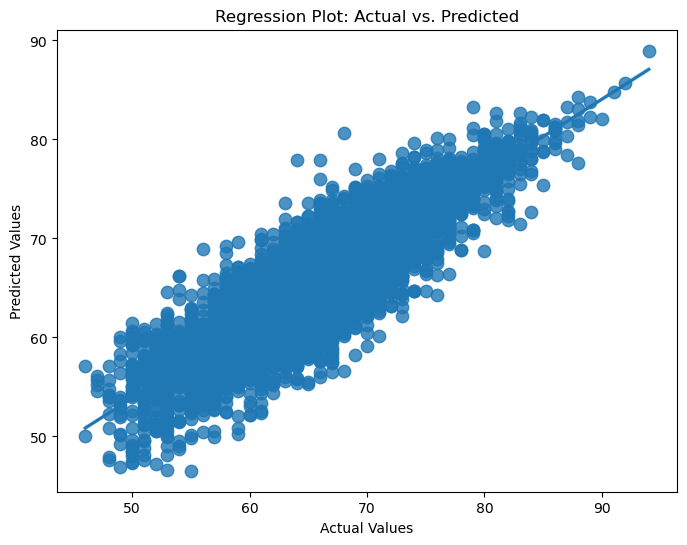

In [103]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 80})
plt.title("Regression Plot: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Scatter Plot

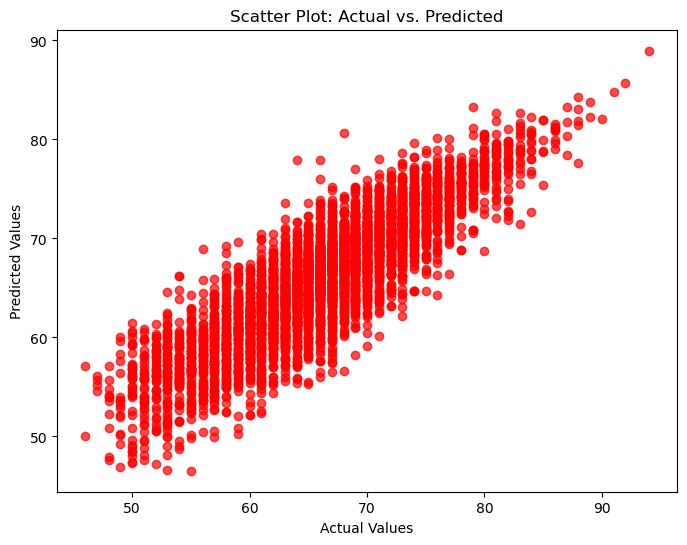

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.7)
plt.title("Scatter Plot: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Residual Plot

In [109]:
residuals = y_test - y_pred

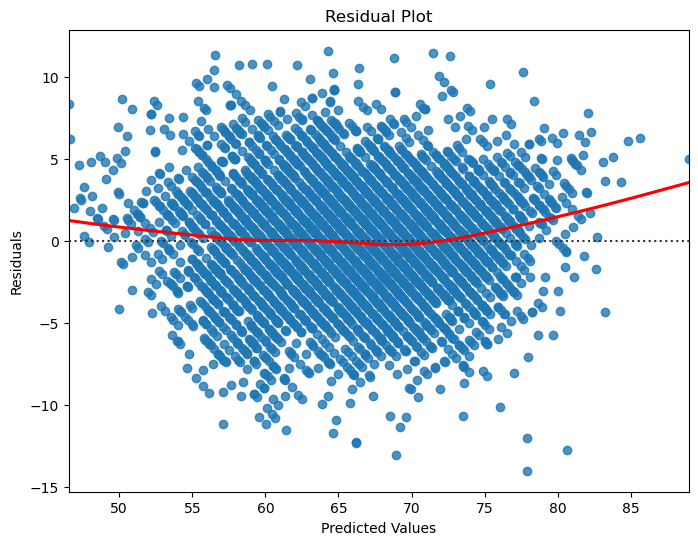

In [111]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Saving the tuned model

In [113]:
import joblib
import pickle

In [114]:
joblib.dump(tuned_model,'ridge_model_ipynb.pkl')

['ridge_model_ipynb.pkl']

Result

In [121]:
print(f"\n Mean Square Error = {mse:.2f} \n Root Mean Square Error = {rmse:.2f} \n Mean Absolute Error = {mae:.2f} \n R2 score = {r2:.2f}")


 Mean Square Error = 12.20 
 Root Mean Square Error = 3.49 
 Mean Absolute Error = 2.76 
 R2 score = 0.75
